In [9]:
from sympy import *
init_printing()
import numpy as np

In [10]:
m0,m1,m2,v0,v,a,G = symbols("m0, m1, m2, v0, v, a, G")
r0,r1,r2,p0,p1,p2 = symbols("r0,r1,r2,p0,p1,p2")

In [11]:
#Jacobi variables
M1 = m0 + m1
M2 = m0 + m1 + m2
m1p = m1*m0/M1           #p for prime, as in jacobi coordinates
m2p = m2*M1/M2
r1p = r1 - r0
r2p = r2 - (m1*r1 + m0*r0)/M1
p1p = m1p*(p1/m1 - p0/m0)
p2p = m2p*(p2/m2 - p1/M1 - p0/M1)

In [12]:
H_k = 0.5*p2p*p2p/m2p + 0.5*p1p*p1p/m1p - G*M1*m1p/r1p - G*M2*m2p/r2p
H_i = -G*m1*m2/(r1 - r2) - G*m0*m2/(r0 - r2) + G*M2*m2p/r2p

In [13]:
A = -(diff(H_k,p0)*diff(H_i,r0) + diff(H_k,p1)*diff(H_i,r1) + diff(H_k,p2)*diff(H_i,r2))
B = 0.5*H_k + H_i

In [14]:
#differentiate
diff0 = diff(A,r0)*diff(B,p0) - diff(A,p0)*diff(B,r0)
diff1 = diff(A,r1)*diff(B,p1) - diff(A,p1)*diff(B,r1)
diff2 = diff(A,r2)*diff(B,p2) - diff(A,p2)*diff(B,r2)
result = diff0 + diff1 + diff2

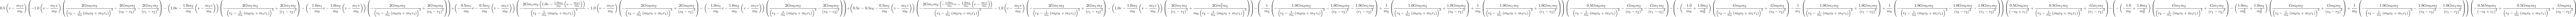

In [43]:
#assumptions
#basic
result = result.subs({p0:m0*v0, p1:m1*v, p2:m2*v})  #assume planet/planetesimal have roughly same velocity
result = result.subs({m0+m1:m0, m0+m2:m0, m1+m2:m2})
result = result.subs(-1.0/m1 - 1.0*m2/m0**2, -1.0/m1)

#more specific m0>>m2>>m1, v1=v2 >> v0 subs
result = result.subs({1.0*v-1.0*v0:1.0*v, (v-v0):v})
result = result.subs({1.0*v-1.0*m2*v/m0:1.0*v, 0.5*v-0.5*v0-0.5*m2*v/m0:0.5*v, -1.0*m1*v/m0-1.0*m2*v/m0:1.0*m2*v/m0})

result

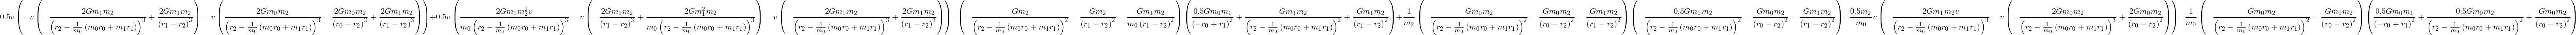

In [47]:
#checkpoint
term1 = 2*G/(r2 - (m0*r0 + m1*r1)/m0)**3
term2 = 2*G*m1*m2/(r1 - r2)**3
term3 = G/(r2 - (m0*r0 + m1*r1)/m0)**2
term4 = G*m1*m2/(r1 - r2)**2

rs1 = -v*(term1*m0*m2 - 2*G*m0*m2/(r0 - r2)**3 + term2) -v*(-term1*m1*m2 + term2) 
rs2 = -term1*m1*m2*v - v*(-term1*m0*m2 + 2*G*m0*m2/(r0-r2)**2) 
rs3 = -term1*m1*m2*(-m2*v/m0) - v*(-term1*m1*m2 + term2) -v*(-term2 + term1*m1*m1*m2/m0)
rs4 = (-1/m2)*(-term3*m0*m2 - G*m0*m2/(r0-r2)**2 - term4)
rs5 = -(0.5*term3*m0*m2 + G*m0*m2/(r0-r2)**2 + term4) 
rs6 = (term3*m2 + G*m2/(r0-r2)**2) - (term3*m2 + term4/m1) + (-term3*m2 - G*m2/(r0-r2)**2 - term4/m0)
rs7 = 0.5*G*m0*m1/(r1 - r0)**2 + term3*m1*m2 + term4
rs8 = (1/m0)*(-term3*m0*m2 - G*m0*m2/(r0-r2)**2)
rs9 = 0.5*G*m0*m1/(r1 - r0)**2 + 0.5*term3*m0*m2 + G*m0*m2/(r0 - r2)**2

result_simple = 0.5*v*rs1 + (-0.5*m2*v/m0)*rs2 + 0.5*v*rs3 - rs4*rs5 - rs6*rs7 - rs8*rs9
result_simple

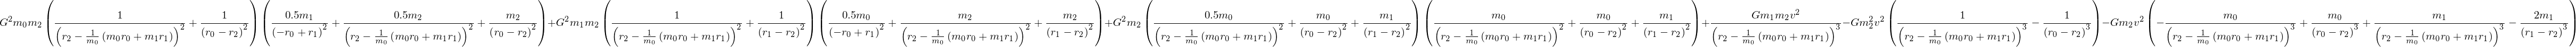

In [51]:
#checkpoint 2
term5 = 1/(r2 - (m0*r0 + m1*r1)/m0)**3
term6 = 1/(r0 - r2)**3
term7 = 1/(r2 - (m0*r0 + m1*r1)/m0)**2
term8 = 1/(r0 - r2)**2
term9 = 1/(r1 - r2)**2
term10 = 1/(r1 - r2)**3

rs11 = -G*m2*v**2*(m1*term5 - 2*m1*term10 -m0*term5 + m0*term6)
rs12 = -G*m2**2*v**2*(term5 - term6)
rs13 = v**2*G*m1*m2*term5
rs14 = G**2*m2*(m0*term7 + m0*term8 + m1*term9)
rs15 = 0.5*m0*term7 + m0*term8 + m1*term9
rs16 = -G**2*m2*m1*(term7 + term9)
rs17 = 0.5*m0/(r1 - r0)**2 + m2*term7 + m2*term9
rs18 = -G**2*m0*m2*(term7 + term8)
rs19 = 0.5*m1/(r1 - r0)**2 + 0.5*term7*m2 + term8*m2

result_simple2 = rs11 + rs12 + rs13 + rs14*rs15 - rs16*rs17 - rs18*rs19
result_simple2

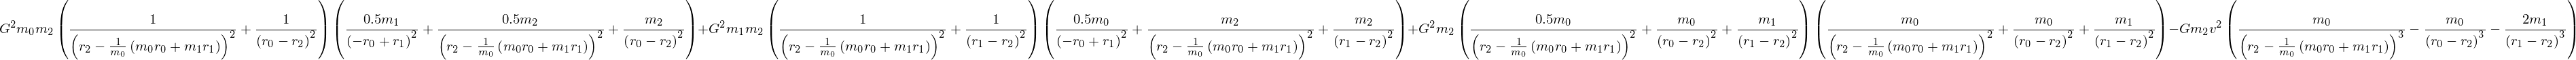

In [52]:
#checkpoint 3
rs21 = -G*m2*v**2*(m0*term5 - m0*term6 - 2*m1*term10)
rs24 = G**2*m2*(m0*term7 + m0*term8 + m1*term9)
rs25 = 0.5*m0*term7 + m0*term8 + m1*term9
rs26 = -G**2*m2*m1*(term7 + term9)
rs27 = 0.5*m0/(r1 - r0)**2 + m2*term7 + m2*term9
rs28 = -G**2*m0*m2*(term7 + term8)
rs29 = 0.5*m1/(r1 - r0)**2 + 0.5*term7*m2 + term8*m2

result_simple3 = rs21 + rs24*rs25 - rs26*rs27 - rs28*rs29
result_simple3